# Statistics 1: Descriptive Statistics

**Package/module refs:** 
- [pandas](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.html) for storing your data
- [numpy](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) for storing data and fast descriptive statistics, quantiles, and lots of modules dealing with random numbers
- [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) for the mode, and other things
- [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html) for visualizing your data


External Resources:

- Khan Academy
- Think Bayes

Progression:

- Average/Mean (sample vs population)
- Median + difference from the mean
- Mode
- Standard Deviation & variance (sample vs population & N - 1)
- Standard error
- Quantiles

## The Problem

- Tons of data with a number of characteristics
- Want to talk intelligently about data without seeing every single entry
- Need to know about what's most common, the ranges of distributions, etc.

## The Solution (to start)

**DESCRIPTIVE STATISTICS!**

## Averages/Means - Getting a Feeling for the Data

- For some *NUMERICAL* measurements, average/mean gives you a sense of the "middle" of your data. May not represent an actual data point, but moreso where the middle of that data set is.
- Consider the set of height measurements (in feet):

| Person | Height |
| ------ | ------ |
| Dante Fierro | 5.9 |
| Sun Quan | 5.5 |
| Spike Spiegel | 6.1 |
| Commander Shepard | 6.0 |
| The Dragonborn | 7.2 |

- The mean height is calculated as:

\begin{eqnarray}
\mu_h &=& \displaystyle\frac{(h_1 + h_2 + h_3 + h_4 + h_5)}{5}\\
       &=& \displaystyle\frac{1}{N}\sum_{i = 1}^N h_i\\
       &=& 6.14 \text{ feet}
\end{eqnarray}

## Averages/Means - Do It With Code!

In [1]:
# the height data
heights = [5.9, 5.5, 6.1, 6.0, 7.2]

# explicit sum
avg1 = (5.9 + 5.5 + 6.1 + 6.0 + 7.2) / 5
print("Explicit Average: (5.9 + 5.5 + 6.1 + 6.0 + 7.2) / 5 = {0}\n".format(avg1))

# actually use some Python
avg2 = sum(heights) / len(heights)
print("Better Average: sum(heights) / len(heights) = {0}\n".format(avg2))

# explicitly using the list and a loop
avg3 = 0
for ii in range(len(heights)):
    avg3 += heights[ii]
avg3 = avg3 / len(heights)
print("Explicitly with the list {0}\n".format(avg3))

# get more sophisticated with Numpy
import numpy as np

avg4 = np.mean(heights)
print("Numpy Average: np.mean(heights) = {0}".format(avg4))

Explicit Average: (5.9 + 5.5 + 6.1 + 6.0 + 7.2) / 5 = 6.14

Better Average: sum(heights) / len(heights) = 6.14

Explicitly with the list 6.14

Numpy Average: np.mean(heights) = 6.14


## Just stick with Numpy for your means...
Convention for using the `numpy` package is to import it as `np`. Since in your analysis you may use any number of numpy modules, and some of those modules have names that would overwrite python built-ins (e.g. `sum` vs `np.sum`), just import `numpy` as `np` instead of pulling over all the things.

In [2]:
from time import time

np.random.seed(42)

number_measurements = [10, 100, 1000, 10000,
                       100000, 1000000, 10000000, 100000000]
basic_time_taken = []
numpy_time_taken = []

for ii in range(len(number_measurements)):
    dummy_measurements = np.random.random(size=number_measurements[ii])
    t0 = time()
    dummy_calc = sum(dummy_measurements) / len(dummy_measurements)
    basic_time_taken.append(time() - t0)

    t0 = time()
    nummy_calc = np.mean(dummy_measurements)
    numpy_time_taken.append(time() - t0)

del dummy_measurements

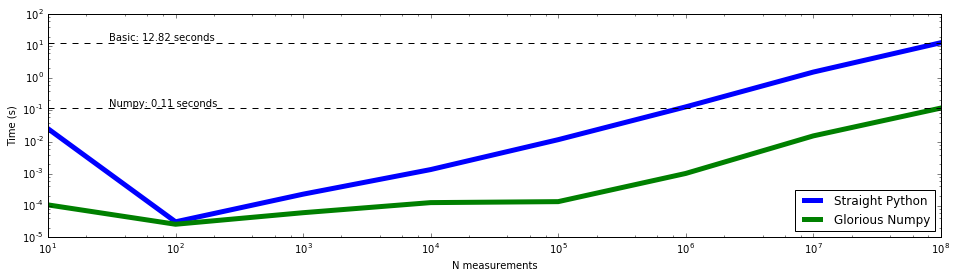

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))
plt.plot(number_measurements, basic_time_taken,
         label="Straight Python", linewidth=5)
plt.plot(number_measurements, numpy_time_taken,
         label="Glorious Numpy", linewidth=5)
plt.plot([1E1, 1E8], [max(basic_time_taken), max(
    basic_time_taken)], linestyle="--", color='k')
plt.plot([1E1, 1E8], [max(numpy_time_taken), max(
    numpy_time_taken)], linestyle="--", color='k')
plt.text(30, 1.1 * max(basic_time_taken), "Basic: %.2f seconds" %
         (max(basic_time_taken)))
plt.text(30, 1.1 * max(numpy_time_taken), "Numpy: %.2f seconds" %
         (max(numpy_time_taken)))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N measurements")
plt.ylabel("Time (s)")
plt.legend(loc="best")
plt.show()

## Always visualize your data
The above example is just the visualization of a time test, but the principle follows that whenever you have data that you want to know the behavior of, visualize it. [Here is a basic tutorial](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb) on plotting data with `matplotlib`. It does scatter plots instead of the line plots above, but the principle is the same.

- **plt.figure:** sets up your figure space, and lets you control how big your figure is
- **plt.title:** puts a title on your figure
- **plt.plot:** plots a line (but can also plot points; use "scatter" for that)
- **plt.text:** allows you to place text on your graph, provided coordinates and text
- **plt.xscale/plt.yscale:** switches between a linear scale (1, 2, 3, 4, 5) and a logarithmic scale (1, 10, 100, 1000)
- **plt.xlim/plt.ylim:** sets the limits on the x or y axis.
- **plt.legend:** lets you produce a legend for your data if you provide labels

## Averages/Means - Limitations

Massive, often bogus assumption that your data is distributed "normally" around some value:

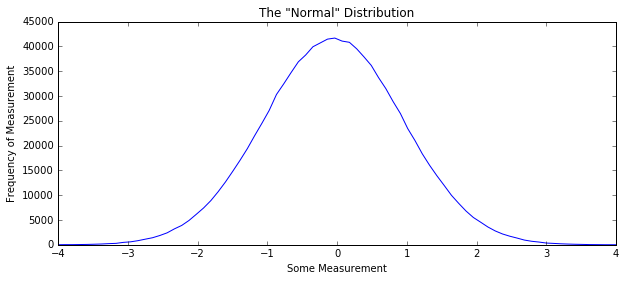

In [4]:
some_data = np.random.normal(size=1000000)
H, edges = np.histogram(some_data, bins=100)

plt.figure(figsize=(10, 4))
plt.title('The "Normal" Distribution')
plt.plot(edges[:-1], H)
plt.xlim(-4, 4)
plt.xlabel("Some Measurement"); plt.ylabel("Frequency of Measurement")
plt.show()

## np.histogram - a valuable tool
A [histogram](https://en.wikipedia.org/wiki/Histogram) shows the counts of some range of values for values in a data set. `np.histogram` takes a list, or array-like object and the number or set of bins for your data as arguments. It returns histogrammed data (a numpy array of frequency counts), as well as the edges of each of the bins in that histogram. If there are N bins in your histogram, the edges will be of length N + 1.

## Averages/Means - Limitations

- Sample averages can be very sensitive to outliers (values significantly outside the norm)
- Also sensitive to the size of data set
- Doesn't accurately describe data with multiple peaks and otherwise non-standard distributions
- Recall our collections of height

In [5]:
heights = [5.9, 5.5, 6.1, 6.0, 7.2]
print("No outliers average: %.2f\n" % np.mean(heights))

heights = [5.9, 5.5, 6.1, 6.0, 7.2, 1.0]
print("Data + baby average: %.2f\n" % np.mean(heights))

heights = [5.9, 5.5, 6.1, 6.0, 7.2, 10.0]
print("Data + sasquatch average: %.2f" % np.mean(heights))

No outliers average: 6.14

Data + baby average: 5.28

Data + sasquatch average: 6.78


## Median - The Literal Middle

- Sort data from small to large
- The median = the **exact** middle 
- If even number of data points, median is average of middle two
- Also known as the 50th percentile (more later)
- Advantage: insensitive to outliers

In [6]:
some_values = [0., 1., 2., 3., 4., 5., 6., 7.]
counts = [18, 36, 22, 58, 12, 6, 100]
data = []

for ii in range(len(counts)):
    for jj in range(counts[ii]):
        data.append(some_values[ii])
        
print("The average: %.2f" % np.mean(data))
print("The actual middle: %.2f" % np.median(data))

The average: 3.70
The actual middle: 3.00


## Standard Deviation - The Spread of the Data

- Based on the average ($\mu$) of the data.
- "On average, how far is each data point from the mean?" 
- Two types to be aware of: **population** and **sample**
    - **population** standard deviation: For when you have *every possible measurement* for some data set or you're only interested in the sample you have and don't wish to generalize, e.g. ALL the ages of adults in the United States
    
    \begin{align}
    \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N(x - \mu)^2}
    \end{align}
    
    - **sample** standard deviation: For when you only have a sampling of the total population. When in doubt, assume the sample standard deviation (the for sufficiently large numbers, $N - 1 \approx N$), e.g. the ages of American males in the Pacific North West
    
    \begin{align}
    s = \sqrt{\frac{1}{N - 1}\sum_{i=1}^N(x - \bar{x})^2}
    \end{align}

    **note: $\bar{x}$ is the sample mean, which follows the same equation as population mean

In [7]:
heights = [5.9, 5.5, 6.1, 6.0, 7.2, 5.1, 5.3, 6.0, 5.8, 6.0]
print("Sample average: %.2f" % np.mean(heights))
print("Sample standard deviation: %.2f" % np.std(heights, ddof=1))
print("Improper standard deviation: %.2f\n" % np.std(heights))

large_num_heights = np.random.random(size=100000)*1.5 + 5.0
print("Sample average: %.2f" % np.mean(large_num_heights))
print("Sample standard deviation: %.2f" % np.std(large_num_heights, ddof=1))
print("Less improper standard deviation: %.2f" % np.std(large_num_heights))

Sample average: 5.89
Sample standard deviation: 0.57
Improper standard deviation: 0.54

Sample average: 5.75
Sample standard deviation: 0.43
Less improper standard deviation: 0.43


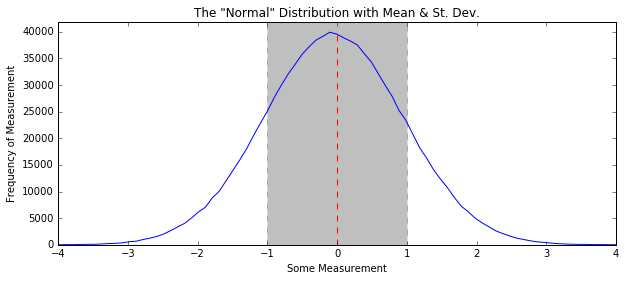

In [8]:
some_data = np.random.normal(size=1000000)
H, edges = np.histogram(some_data, bins=100)

plt.figure(figsize=(10, 4))
plt.title('The "Normal" Distribution with Mean & St. Dev.')
plt.plot(edges[:-1], H)
plt.plot([np.mean(some_data), np.mean(some_data)],
         [0, max(H)], linestyle="--", color="r")
plt.fill_between([np.mean(some_data) - np.std(some_data), 
                  np.mean(some_data) + np.std(some_data)],
                 [0, 0],
                 [1.1 * max(H), 1.1 * max(H)], linestyle="--", 
                 color='k', alpha=0.25)
plt.xlim(-4, 4)
plt.ylim(0, 1.05 * max(H))
plt.xlabel("Some Measurement")
plt.ylabel("Frequency of Measurement")
plt.show()

**plt.fill_between:** lets you fill in some space on a plot. You provide the range of x values, as well as the vertical sections you wish to fill between (in this case y=0 up to y=around 40000). For every x value you provide (in this case, two), you provide y values for the lower limit and the upper limit.

## Standard Deviation - The 68-95-99 rule

- 1 standard deviation **from the mean**: 68% of data in distribution
- 2 standard deviations: 95%
- 3 standard deviations: 99.7%
- Applies solely to Normally-distributed data (more on that later)

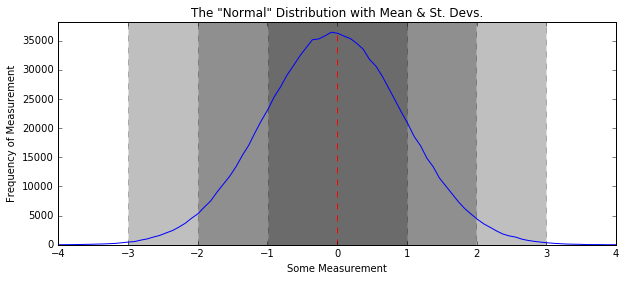

In [9]:
some_data = np.random.normal(size=1000000)
H, edges = np.histogram(some_data, bins=100)

plt.figure(figsize=(10, 4))
plt.title('The "Normal" Distribution with Mean & St. Devs.')
plt.plot(edges[:-1], H)
plt.plot([np.mean(some_data), np.mean(some_data)], [0, max(H)], linestyle="--", color="r")
plt.fill_between([np.mean(some_data) - 3*np.std(some_data), np.mean(some_data) + 3*np.std(some_data)], 
                 [0, 0], 
                 [1.1*max(H), 1.1*max(H)], linestyle="--", color='k', alpha=0.25)
plt.fill_between([np.mean(some_data) - 2*np.std(some_data), np.mean(some_data) + 2*np.std(some_data)], 
                 [0, 0], 
                 [1.1*max(H), 1.1*max(H)], linestyle="--", color='k', alpha=0.25)
plt.fill_between([np.mean(some_data) - np.std(some_data), np.mean(some_data) + np.std(some_data)], 
                 [0, 0], 
                 [1.1*max(H), 1.1*max(H)], linestyle="--", color='k', alpha=0.25)
plt.xlim(-4, 4)
plt.ylim(0, 1.05*max(H))
plt.xlabel("Some Measurement"); plt.ylabel("Frequency of Measurement")
plt.show()

## Mode - The most frequent thing(s)


- Nothing fancy here; the mode is whatever number(s) pop up most often

In [10]:
import scipy.stats as sp

some_values = [0., 1., 2., 3., 4., 5., 6., 7.]
counts1 = [18, 36, 22, 58, 12, 6, 100]
data1 = []

for ii in range(len(counts1)):
    for jj in range(counts1[ii]):
        data.append(some_values[ii])
        
print("The mode: %g" % sp.mode(data)[0])

The mode: 6


[scipy's stats](http://docs.scipy.org/doc/scipy-0.16.0/reference/stats.html) module contains tons of things for statistics, including functions for reproducing some of the distributions we'll see later

## Quantiles - Values some fraction of the way into something

- If I'm some percentage through ordered data, what value do I get?
- 50th percentile = median = $q_{50}$
- One quartile: $q_{25}$
- Interquartile range (IQR) - the difference between $q_{75}$ and $q_{25}$. $IQR$ gives you a sense of the spread of the data when the data isn't normally distributed
$$IQR = q_{75} - q_{25}$$

In [11]:
some_values = [0., 1., 2., 3., 4., 5., 6., 7.]
counts = [18, 36, 22, 58, 12, 6, 100]
data = []

for ii in range(len(counts)):
    for jj in range(counts[ii]):
        data.append(some_values[ii])
        
print("The average: %.2f" % np.mean(data))
print("The actual middle: %.2f\n" % np.median(data))

print("The standard deviation: %.2f" % np.std(data))
q75, q25 = np.percentile(data, [75, 25])
print("The interquartile width: %.2f" % (q75 - q25))

The average: 3.70
The actual middle: 3.00

The standard deviation: 2.13
The interquartile width: 4.00


## Descriptive Statistic Module References
- <b>[numpy.mean](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html)</b>
- <b>[numpy.std](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.std.html)</b>
- <b>[numpy.percentile](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.percentile.html)</b>
- <b>[numpy.median](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.median.html)</b>